In [1]:
from pathlib import Path
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
plt.style.use('classic')

In [2]:
def read_metric_from_file(path):
    return json.load(path.open("r"))

columns = ["Sacrifice Ratio", "Unsatisfaction Mean", "Unsatisfaction Std", "Weighted Objective"]

def read_data(output_dir, filename, params, num_seed=0):
    metrics = defaultdict(list)
    for param in params:
        if num_seed == 0:
            path = Path(output_dir) / (filename.format(param).replace(".", "_") + ".json")
            metric = read_metric_from_file(path)
            for key in columns:
                metrics[key].append(float(metric[key]))
        else:
            metrics_ = defaultdict(list)
            for seed in range(1, num_seed + 1):
                path = Path(output_dir) / (filename.format(param, seed).replace(".", "_") + ".json")
                metric = read_metric_from_file(path)
                for key in columns:
                    metrics_[key].append(float(metric[key]))
            for key in metrics_:
                data = np.array(metrics_[key])
                metrics[f"{key}_mean"].append(data.mean())
                metrics[f"{key}_std"].append(data.std())
    return metrics

In [3]:
def result_plot(metrics, param_name, params, xaxis_log=False, errorbar=False):
    columns = ["Sacrifice Ratio", "Unsatisfaction Mean", "Unsatisfaction Std", "Weighted Objective"]
    fig = plt.figure(figsize=(10,10))
    show_legend = not isinstance(metrics, defaultdict)
    for i in range(4):
        plt.subplot(2, 2, i+1)
        key = columns[i]
        if show_legend:
            for x in metrics:
                if errorbar:
                    mean = metrics[x][f"{key}_mean"]
                    std = metrics[x][f"{key}_std"]
                    plt.errorbar(params, mean, yerr=std, label=x)
                else:
                    y = metrics[x][key]
                    plt.plot(params, y, label=x)
            plt.legend()
        else:
            if errorbar:
                mean = metrics[f"{key}_mean"]
                std = metrics[f"{key}_std"]
                plt.errorbar(params, mean, yerr=std)
            else:
                y = metrics[key]
                plt.plot(params, y)
        plt.title(key)
        plt.xlabel(param_name)
        if xaxis_log:
            plt.xscale('log')
        else:
            _, right = plt.xlim()
            plt.xlim(right=right*1.05)

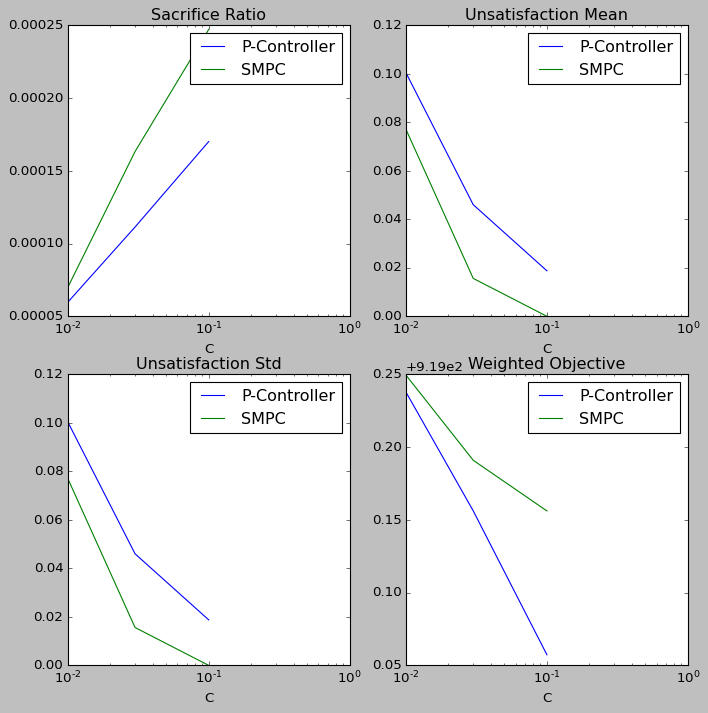

In [4]:
param_name = "C"
params = [0.01, 0.03, 0.1]
metrics = {"P-Controller": read_data("outputs/pc_c/xc", "pc_c_{}", params, 0),
"SMPC": read_data("outputs/smpca_c/xc", "smpca_c_{}_b_100_bo_10", params, 0)}
result_plot(metrics, param_name, params, True, False)

In [6]:
param_name = "B_offline (C = 0.3, B_online = 10)"
params = [10, 25, 50, 100, 200]
metrics = read_data("outputs/smpca_b/xc", "smpca_c_0_3_b_{}_bo_10", params, 0)
# result_plot(metrics, param_name, params, False)

FileNotFoundError: [Errno 2] No such file or directory: 'outputs/smpca_b/xc/smpca_c_0_3_b_10_bo_10.json'

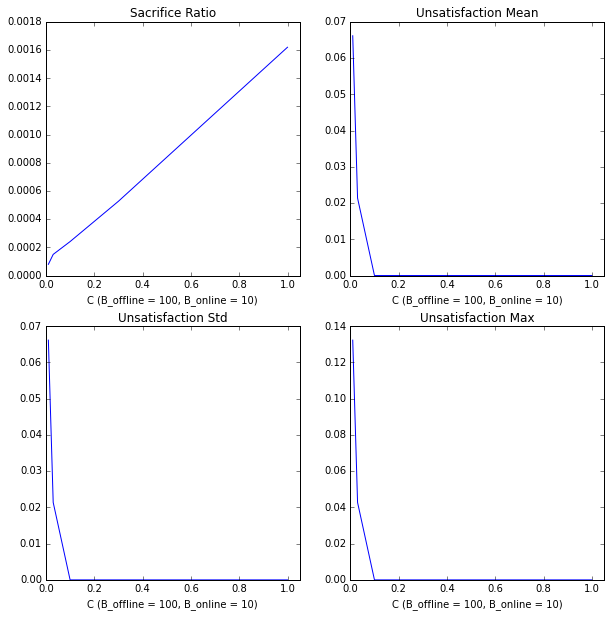

In [9]:
param_name = "C (B_offline = 100, B_online = 10)"
params = [0.01, 0.03, 0.1, 0.3, 1.0]
metrics = read_data("outputs/smpca_c/xc", "smpca_c_{}_b_100_bo_10", params, 0)
result_plot(metrics, param_name, params, False)

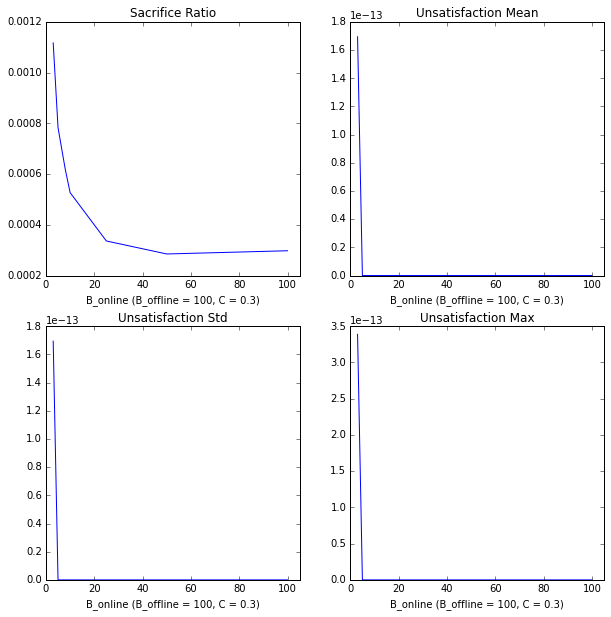

In [5]:
param_name = "B_online (B_offline = 100, C = 0.3)"
params = [3, 5, 8, 10, 25, 50, 100]
metrics = read_data("outputs/smpca_bo/xc", "smpca_c_0_3_b_100_bo_{}", params, 0)
result_plot(metrics, param_name, params, False)

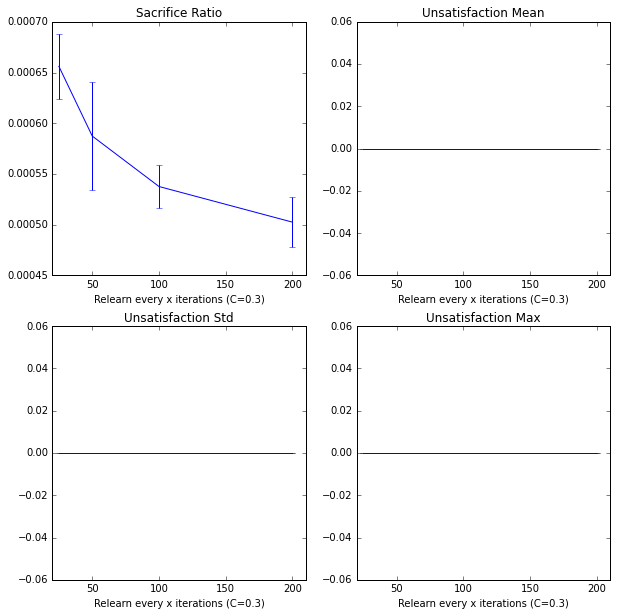

In [8]:
param_name = "Relearn every x iterations (C=0.3)"
params = [25, 50, 100, 200]
metrics = read_data("outputs/smpca_relearn/xc", "smpca_relearn_{}_c_0_3_b_100_bo_10_seed_{}", params, 5)
result_plot(metrics, param_name, params, True)

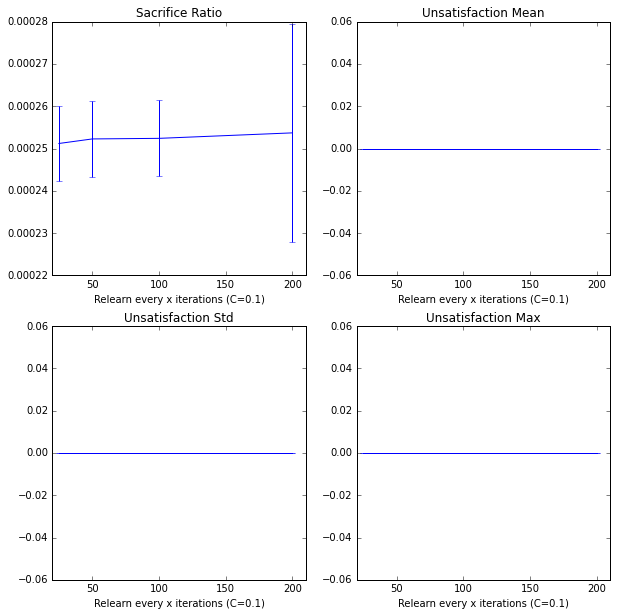

In [7]:
param_name = "Relearn every x iterations (C=0.1)"
params = [25, 50, 100, 200]
metrics = read_data("outputs/smpca_relearn/xc", "smpca_relearn_{}_c_0_1_b_100_bo_10_seed_{}", params, 5)
result_plot(metrics, param_name, params, True)

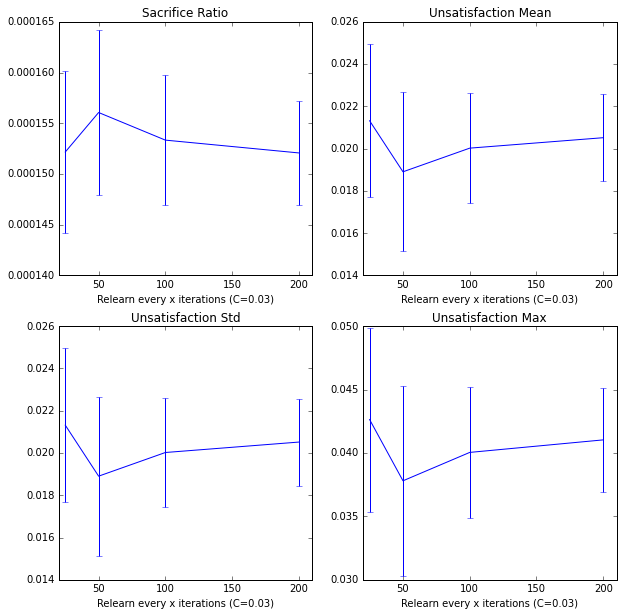

In [6]:
param_name = "Relearn every x iterations (C=0.03)"
params = [25, 50, 100, 200]
metrics = read_data("outputs/smpca_relearn/xc", "smpca_relearn_{}_c_0_03_b_100_bo_10_seed_{}", params, 5)
result_plot(metrics, param_name, params, True)

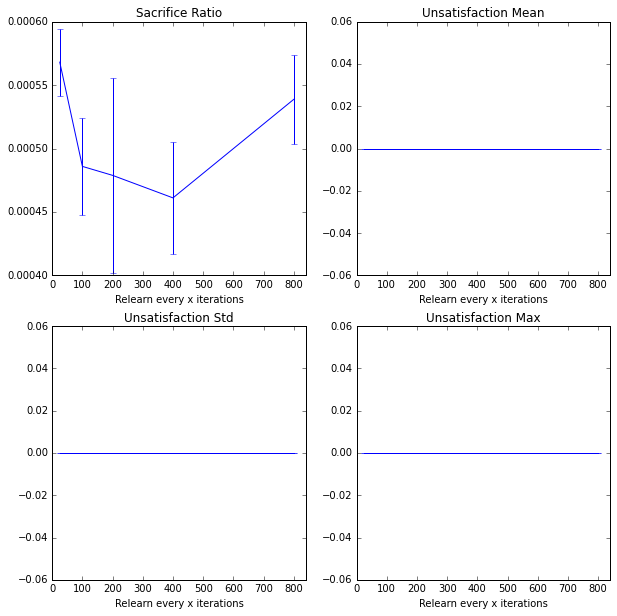

In [8]:
aram_name = "Training Size (B_offline = 100, C = 0.3, B_online = 10)"
params = [25, 100, 200, 400, 800]
metrics = read_data("outputs/smpca_ts/xc", "smpca_ts_{}_c_0_3_b_100_bo_10_seed_{}", params, 5)
result_plot(metrics, param_name, params, True)

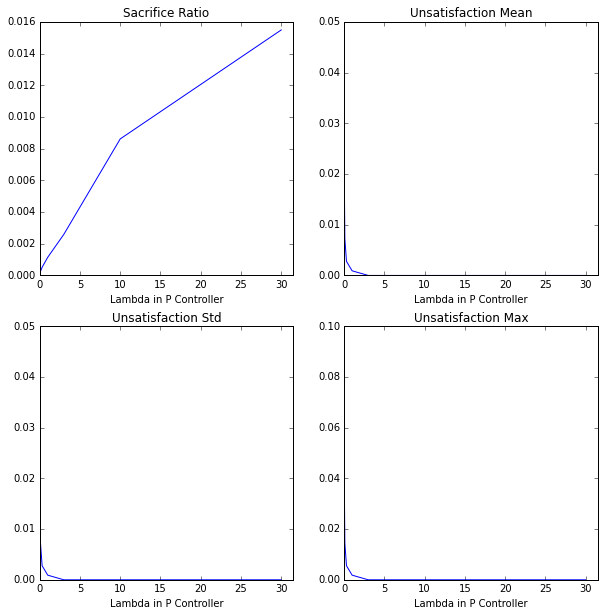

In [9]:
param_name = "Lambda in P Controller"
params = [0.01, 0.03, 0.1, 0.3, 1.0, 3.0, 10.0, 30.0]
metrics = read_data("outputs/pc_lambda/xc", "pc_lambda_{}", params, 0)
result_plot(metrics, param_name, params, False)

In [34]:
import pandas as pd
print(pd.read_csv("outputs/xc.csv"))

                 Controller       DCG  Sacrifice Ratio
0              P-Controller  4.517234         0.002594
1  Online Linear Programing  4.525065         0.000865
2                      SMPC  4.526250         0.000604
3             SMPC(Variant)  4.526596         0.000527
